## Transformer

Reference - [`Transformer` ](https://arxiv.org/abs/1706.03762). 

The Transformer in Machine Learning is an Encoder-Decoder model based on the Attention mechanism. The wide usage of Transformers in GPT-3, BERT, and Codex is creating a new wave in NLP, time series prediction, etc. The "Attention is all you need." introduces a transformer as an alternate and more efficient model for language translation tasks. The advantages include transformers being parallelizable and requiring less time to train. The Author also states that transformers' performance improved over the best results. The paper centers around the attention mechanism allowing models to attain information from input and output without regard to the distance between input and output sequence.
The Transformer is composed of an encoder and a decoder. The encoder processes each item in the input sequence and compiles the information it captures into a vector called context. Then, based on the context, the decoder produces the output sequence. Both the Encoder and Decoder consist of Embedding layers and Attention layers. The Embedding layer converts the input into embedding vectors used by the attention layer. Attention allows the model to focus on the relevant parts of the input sequence as needed.


<img src="images/transformer.jpeg" width="200" height = "500">

The Transformer is composed of an encoder and a decoder. The encoder processes each item in the input sequence and compiles the information it captures into a vector called context. Then, based on the context, the decoder produces the output sequence. Both the Encoder and Decoder consist of Embedding layers and Attention layers. The Embedding layer converts the input into embedding vectors used by the attention layer. Attention allows the model to focus on the relevant parts of the input sequence as needed.

### Transformer Componenets:

1. Embedding Layers
2. Positional encoding
3. Encoder: Attention and Feed-forward network
4. Decoder: Attention and Feed-forward network

### Embedding Layers: 

Reference - [`Transformer` ](http://jalammar.github.io/illustrated-transformer/). 

The NLP tasks require input vectors of continuous values; thus, plain text strings need vector transformation. For example, words or phrases from a vocabulary are mapped to a corresponding vector of real numbers using word Embedding. The vector representation has two essential advantages: Dimensionality Reduction, which leads to more efficient representation, and Contextual Similarity, which is a more expressive representation. Word Embedding creates a vector representation with a much lower dimensional space called Word Vectors. These vectors are used for semantic parsing to extract information such as the Contextual similarity of words. For example, tigers, horses, and elephants are similar since they all are animals, but we do not expect them to have proximity to dishwashers, washing machines, etc. Hence, the word vectors maintain these similarities, so words that regularly occur nearby in the text will also be nearby in vector space. 

<img src="images/embed.png" width="800" height = "1000">

### Positional encoding: 

The model's attention layers perceive input as a set of vectors with no order. Thus, "Let's eat, grandma" is the same as "Let's eat grandma," Thus, the lack of recurrent or convolution layers needs some way to identify word order. Without the context of order in the input sequence, it will lead to the wrong information or no information from the input. Thus, Positional Encoding is required; The author uses a set of sines and cosines at different frequencies (across the sequence). The positional encoding ensures that nearby elements will have similar encodings. 

<img src="images/positional.png" width="800" height = "1000">

### Encoder: 

The encoder mainly consists of N number of identical layers. In this attention paper, N = 6. Each layer has two sub-layer: a multi-head self-attention layer and a position-wise fully connected feed-forward network. The sub-layers contain residual connections and normalization layers. The residual connection in the sub-layer provides a direct path for the gradient and ensures that the attention layer updates vectors. The ResNet uses the same concept to address the gradient degradation problem in deep neural networks. Therefore, the residual connection provides better gradient flow, easy-to-optimization, and less training error in ResNet. In addition, layer normalization maintains a suitable scale for the output.

<img src="images/encoder.png" width="800" height = "1000">

### Decoder: 

The decoder in this paper also consists of six identical layers. Each layer has two sub-layer: a masked multi-head self-attention layer and a position-wise fully connected feed-forward network. The sub-layers contain residual connections and normalization layers. The masking in the attention layer ensures that the output sequence at position p depends only on the output sequence at positions less than p. 

### Attention: 

The attention layer consists of a Multihead attention block which consists of self-attention layers that maps a query and set of key-value pairs to an output. Each attention function is a "Scaled Dot-Product Attention" in this paper. The input consists of queries and key-value pairs. 

<img src="images/The_transformer_encoders_decoders.png" width="600" height = "500">

The author suspects that large values of dimension of the key will lead the dot products to grow large, thus pushing the softmax function into regions with minimal gradients. Hence, to counteract this effect, scaling is done.

### Multi-Head Attention: 

The attention mechanism is context based on their relativeness. Thus, instead of performing a single attention function, they found it more beneficial to perform multiple attention functions in parallel. The Multi-head attention allows the model to jointly attend to information from different representation subspaces at various positions. 

<img src="images/multi-head-attention.png" width="200" height = "400">

### Physical Model: 

Reference - [`SWE` ](https://www.climatehubs.usda.gov/hubs/northwest/topic/snow-water-equivalent-swe-its-importance-northwest#:~:text=Snow%20water%20equivalent%20(SWE)%20determines,broad%20impacts%20on%20water%20resources.). 

Snow water equivalent (SWE) determines the amount of water available in the snow. However, measuring water retained in an inch of snow is difficult to estimate since the temperature of the air controls the amount. For example, one inch of rain can produce 2 to 50 inches or more of snow, depending on the air temperature. And also, Different storms bring different types of snow that can hold different amounts of water. Throughout winter, other storms bring different types of snow, so snow depth does not translate directly to the amount of water held in snow. Because of this variability, SWE helps to understand how much water the snow contains.

<img src="images/swe_globe.png" width="300" height = "500">


### Data

Reference - [`Data Link` ](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T46ANR).

Havard Dataverse is the data source of my project. The paper "Using an ensemble of artificial neural networks to convert snow depth to snow water equivalent over Canada. '' uses the same data. This dataset contains most of Canada's snow measurement and meteorological data. The information includes 2685 other stations or geographical locations and has sixteen features, such as  SWE(Snow Water Equivalent), Snow depth, Density, Day without snow, etc. The details of the data are below:

<img src="images/data_tab.png" width="700" height = "500">



The custom transformer model uses N = 4 of Encoder layers, hence it has 
N = 4 attention layer.



<img src="images/transformer-1.png" width="700" height = "500">

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
from sklearn import preprocessing

import matplotlib.pyplot as plt
import time
from utils.TransformerArchitecture import transformer
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, CSVLogger

from tensorflow.keras.models import load_model

import tensorflow as tf
from utils.transformer_utils import get_transformer_data
from datetime import datetime

In [2]:
# Loading data from files
canada_train_data_path = "tx_data/data_filtered_train.txt"
canada_val_data_path = "tx_data/data_filtered_val.txt"
canada_test_data_path = "tx_data/data_filtered_test.txt"

X, Y = get_transformer_data(canada_train_data_path, 10)
X_train, Y_train = X, Y[:,-1,:]
print(X_train.shape, Y_train.shape)

X_v, Y_v = get_transformer_data(canada_val_data_path, 10)
X_val, Y_val = X_v, Y_v[:,-1,:]
print(X_val.shape, Y_val.shape)

X_t, Y_t = get_transformer_data(canada_test_data_path, 10)
X_test, Y_test = X_t, Y_t[:,-1,:]
print(X_test.shape, Y_test.shape)

(77133, 10, 15) (77133, 1)
(76827, 10, 15) (76827, 1)
(76899, 10, 15) (76899, 1)


In [3]:
# Hyperparameters
EPOCH = 50     
BATCH = 64
LR    = 0.001 

now = datetime.now()
best_model = "best_model/transformer_best_model-{}.h5".format(now.strftime("%d-%m-%Y-%H:%M:%S"))

In [4]:
sec_len = 10
no_features=15
input_size = sec_len, no_features

In [6]:

transformer_model = transformer(
    input_size = input_size,
    num_layers = 4,
    dff = 64,
    d_model = 8,
    num_heads = 4,
    dropout = 0.0,
    name="transformer_model")
transformer_model.summary()

Model: "transformer_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 10, 15)]          0         
_________________________________________________________________
embedding (Dense)            (None, 10, 8)             128       
_________________________________________________________________
encoder (Functional)         [(None, 10, 8), (None, 4, 5664      
_________________________________________________________________
output1 (Dense)              (None, 10, 1)             9         
_________________________________________________________________
tf.__operators__.getitem_1 ( (None, 10)                0         
Total params: 5,801
Trainable params: 5,801
Non-trainable params: 0
_________________________________________________________________


In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((X, Y[:,-1,:]))
train_dataset = train_dataset.batch(BATCH)

# optimizer = tf.keras.optimizers.Adam(learning_rate = LR, beta_1=0.9, beta_2=0.98,
#                                      epsilon=1e-9)

optimizer = tf.keras.optimizers.Adam(learning_rate = LR)

earlystop = EarlyStopping(monitor='loss', patience=20)
# csvlog = CSVLogger('./tmp/training_log_f_'+file_name+'.csv')
checkpoint = ModelCheckpoint(best_model, monitor='loss', verbose=True, save_best_only=True, save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.95, patience=10, min_lr=1e-16, verbose=1)


transformer_model.compile(
    loss      = tf.keras.losses.MeanSquaredError(),
    optimizer = optimizer)
start = time.time()
history = transformer_model.fit(X, Y[:,-1,:],
                epochs=EPOCH, callbacks=[checkpoint, reduce_lr, earlystop], shuffle=False, 
                                validation_data=(X_val, Y_val)
                )

print ("Training time: {}".format(time.time() - start))

Epoch 1/50
2411/2411 [==============================] - 50s 19ms/step - loss: 0.0401 - val_loss: 0.0020

Epoch 00001: loss improved from inf to 0.00913, saving model to best_model/transformer_best_model-23-12-2022-15:21:24.h5
Epoch 2/50
2411/2411 [==============================] - 44s 18ms/step - loss: 6.9786e-04 - val_loss: 7.1070e-04

Epoch 00002: loss improved from 0.00913 to 0.00055, saving model to best_model/transformer_best_model-23-12-2022-15:21:24.h5
Epoch 3/50
2411/2411 [==============================] - 44s 18ms/step - loss: 3.0500e-04 - val_loss: 6.0204e-04

Epoch 00003: loss improved from 0.00055 to 0.00025, saving model to best_model/transformer_best_model-23-12-2022-15:21:24.h5
Epoch 4/50
2411/2411 [==============================] - 45s 19ms/step - loss: 1.6343e-04 - val_loss: 5.0153e-04

Epoch 00004: loss improved from 0.00025 to 0.00014, saving model to best_model/transformer_best_model-23-12-2022-15:21:24.h5
Epoch 5/50
2411/2411 [==============================] - 45s 

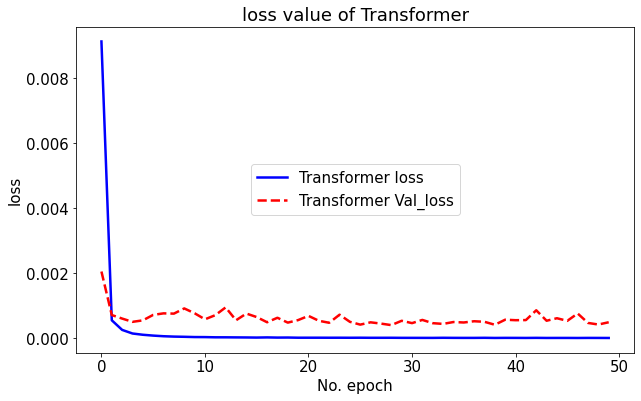

In [8]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], 'b-', linewidth=2.5, label='Transformer loss')
plt.plot(history.history['val_loss'],'r--', linewidth=2.5, label='Transformer Val_loss')
plt.title('loss value of Transformer')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.legend(loc="center")
plt.show()

In [10]:
Y_pred = transformer_model.predict(X)
Y_pred.shape

(77133, 10)

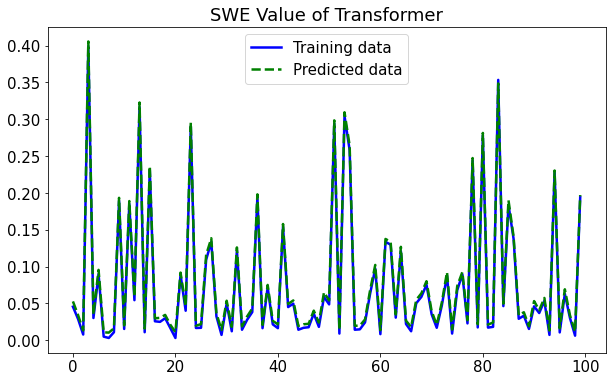

In [11]:
plt.figure(figsize=(10, 6))
# plt.plot(Y_pred[:,1], label='q_predicted')
# plt.plot(Y_train[:,1], label='q')
plt.plot(Y_train[:100,], 'b-', linewidth=2.5, label='Training data')
plt.plot(Y_pred[:,-1][:100,], 'g--', linewidth=2.5, label='Predicted data')
# plt.plot(Y_test, 'r--', linewidth=2.5, label='Test data')
plt.title("SWE Value of Transformer")
plt.legend()
plt.show()

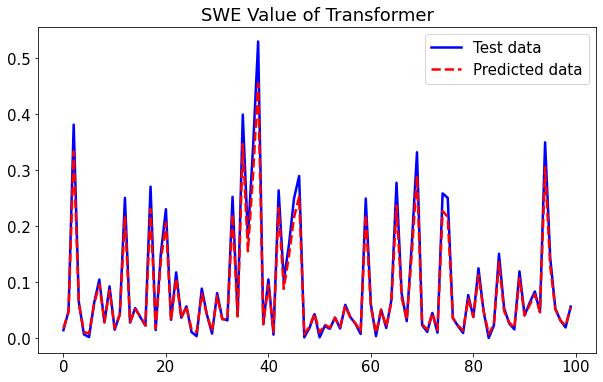

In [12]:
Y_pred_test = transformer_model.predict(X_test)
plt.figure(figsize=(10, 6))
# plt.plot(Y_pred[:,1], label='q_predicted')
# plt.plot(Y_train[:,1], label='q')
plt.plot(Y_test[:100,], 'b-', linewidth=2.5, label='Test data')
plt.plot(Y_pred_test[:, -1][:100,], 'r--', linewidth=2.5, label='Predicted data')
# plt.plot(Y_test, 'r--', linewidth=2.5, label='Test data')
plt.title("SWE Value of Transformer")
plt.legend()
plt.show()

### Observations:

In the implementation of the transformer, the loss = 6.0696e-06 with val_loss = 4.8880e-04. The model captured the overall nonlinear relationship between the predictors and predictand. The model's loss and deviation are slightly higher than the transformer model.